In [2]:
!pip install shap lime wget

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=658503a61e131ff08115771ae2c0e92f4d51b4785b0e823cf0a7567980d313ec
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=da5e622e147b5329cd6d69f5d94710172e7d0428bb5663ee05271469669ad920
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built lime wget


In [3]:
import wget
wget.download('https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/machine learning/utility/explainability_utilies.py')

from explainability_utilies import *

In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/pol.csv'
df = pd.read_csv(url, sep= ';')
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,target
0,110,100,100,100,60,108,76,71,94,0,...,0,0,0,0,0,0,0,0,0,1
1,110,100,100,100,130,77,76,71,94,0,...,0,0,0,0,0,0,0,0,0,1
2,110,100,100,100,110,89,76,71,94,0,...,0,0,0,0,0,0,0,0,0,1
3,110,100,100,100,13,126,89,72,94,0,...,0,0,0,0,0,0,0,0,0,1
4,110,100,100,100,15,119,78,71,94,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,110,100,100,100,15,116,144,79,94,0,...,0,0,0,0,0,0,0,0,0,1
14996,110,100,100,100,16,137,145,71,94,0,...,0,0,0,0,0,0,0,0,0,1
14997,110,100,100,100,123,77,76,71,94,0,...,0,0,0,0,0,0,0,0,0,1
14998,110,100,100,100,18,118,78,71,94,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'target' is the column name for the labels
X = df.drop(columns=['target'])
y = df['target']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
num_round = 100
model  = xgb.XGBClassifier(objective='binary:logistic',
                                    use_label_encoder=False, eval_metric='logloss')
model = model.fit(X_train, y_train)

# Make predictions
preds = model.predict(X_test)
predictions = [round(value) for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       970
           1       0.99      0.99      0.99      2030

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [6]:
importance = feature_importance_XGBoost(columns_name=X.columns, _model = model,
                           data = X_test, target=y_test )

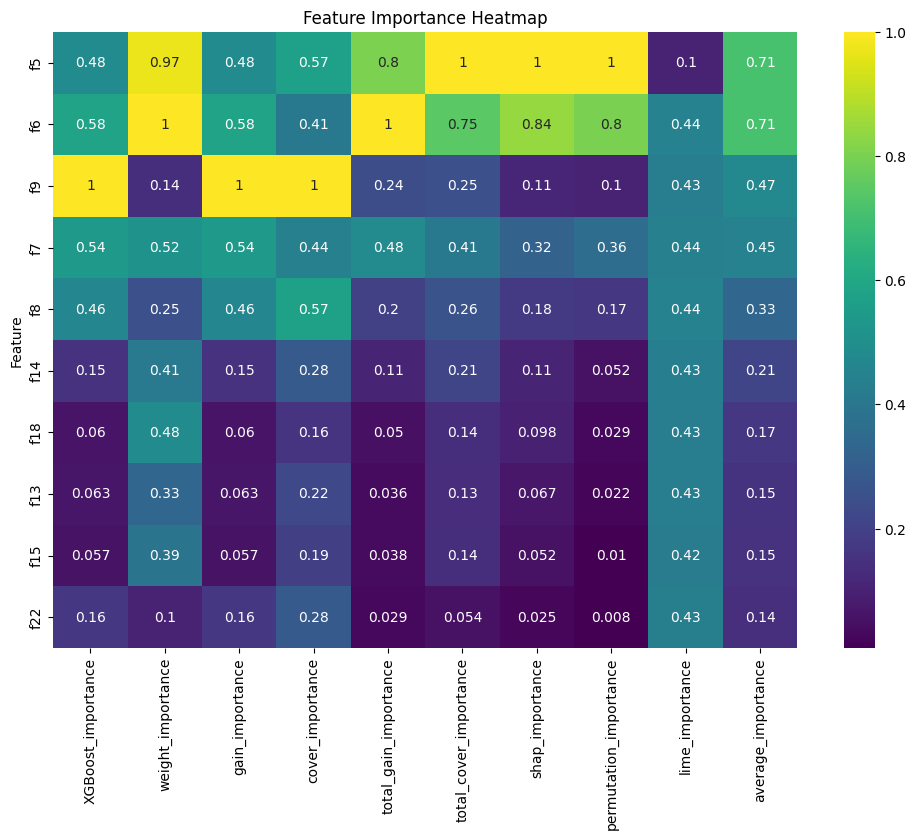

In [7]:
plot_feature_importance_heatmap(importance, num_features=10)

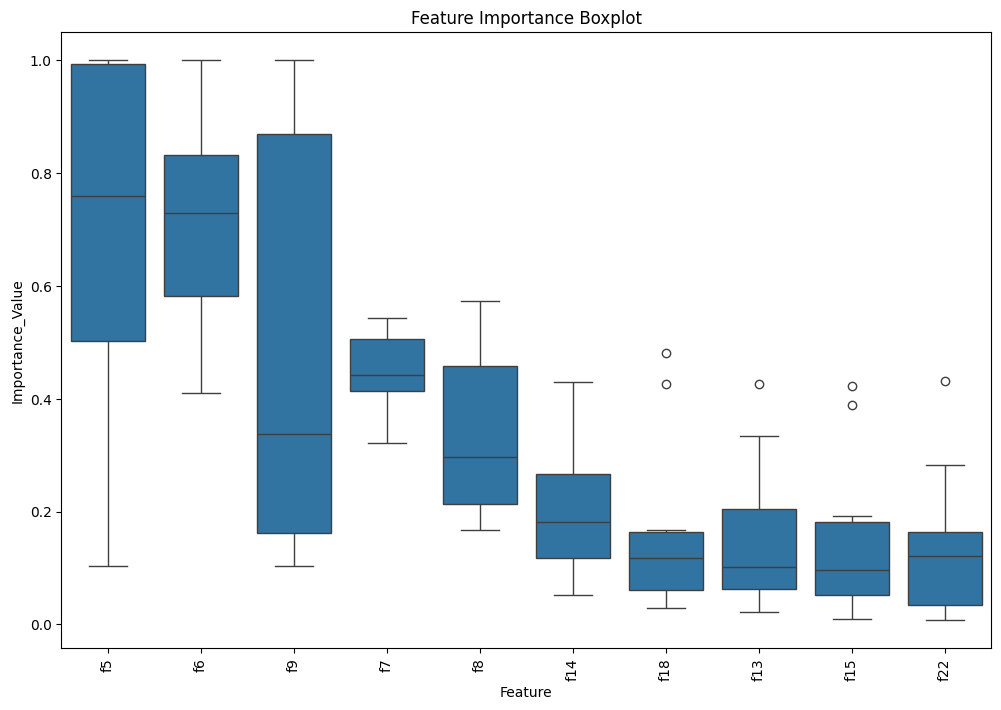

In [8]:
plot_feature_importance_boxplot(importance, num_features=10)

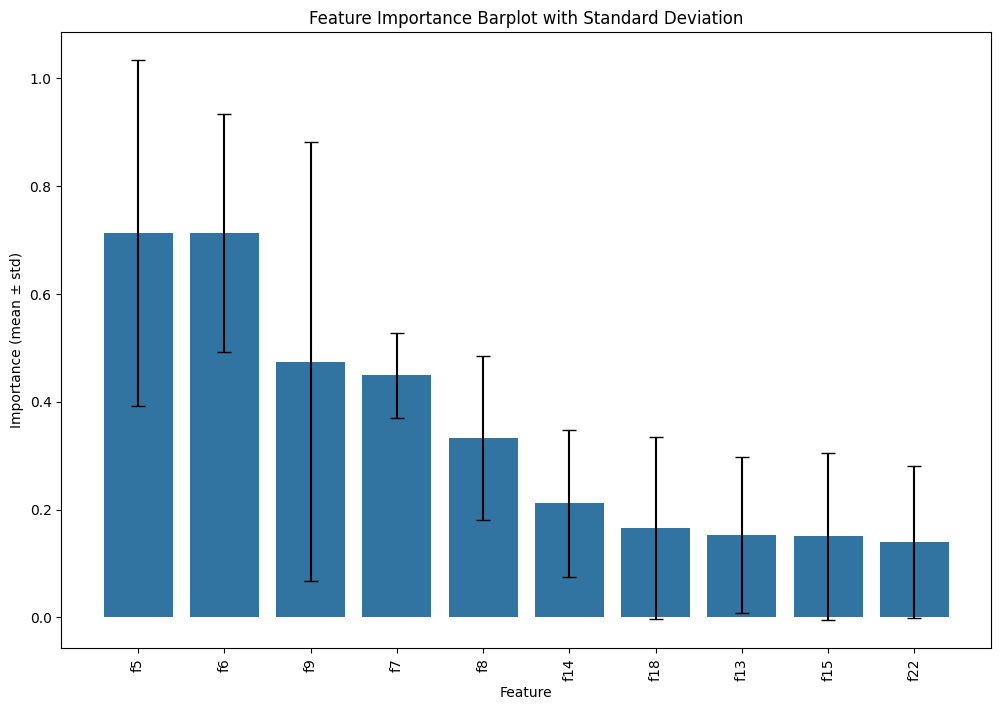

In [9]:
plot_feature_importance_barplot(importance, num_features=10)

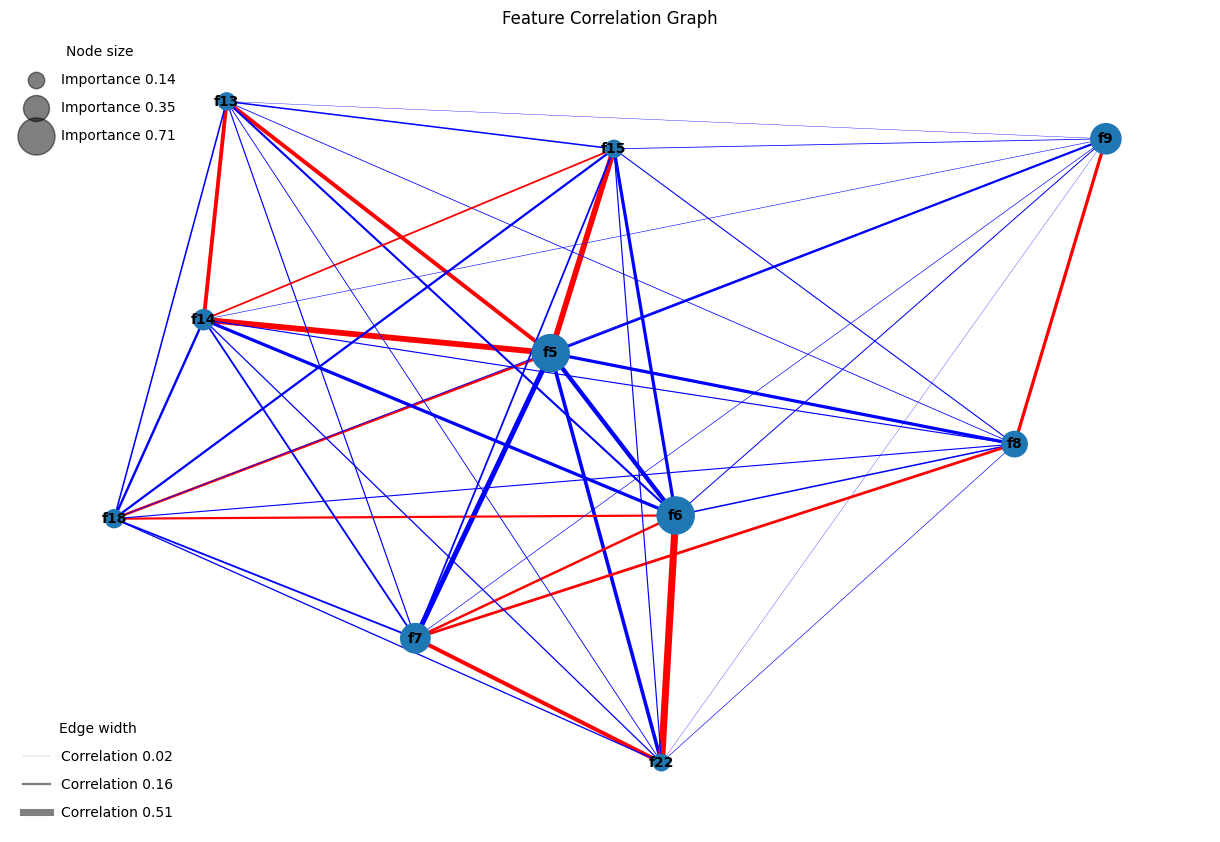

In [11]:
plot_feature_correlation_graph(X, importance, num_features=10, min_corr=0)